In [1]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Step 1: Load the dataset → understand what data looks like.

In [2]:
housing = sk.datasets.fetch_california_housing(as_frame=True)
df = housing.frame

In [3]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Step 2: Exploratory Data Analysis (EDA)

In [4]:
# basic info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
# summary statistics
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


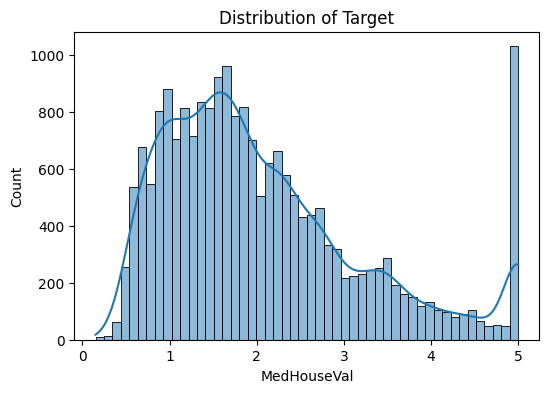

In [6]:
# check target column distribution
plt.figure(figsize=(6,4))
sns.histplot(df["MedHouseVal"],bins=50,kde=True)
plt.title("Distribution of Target")
plt.show()

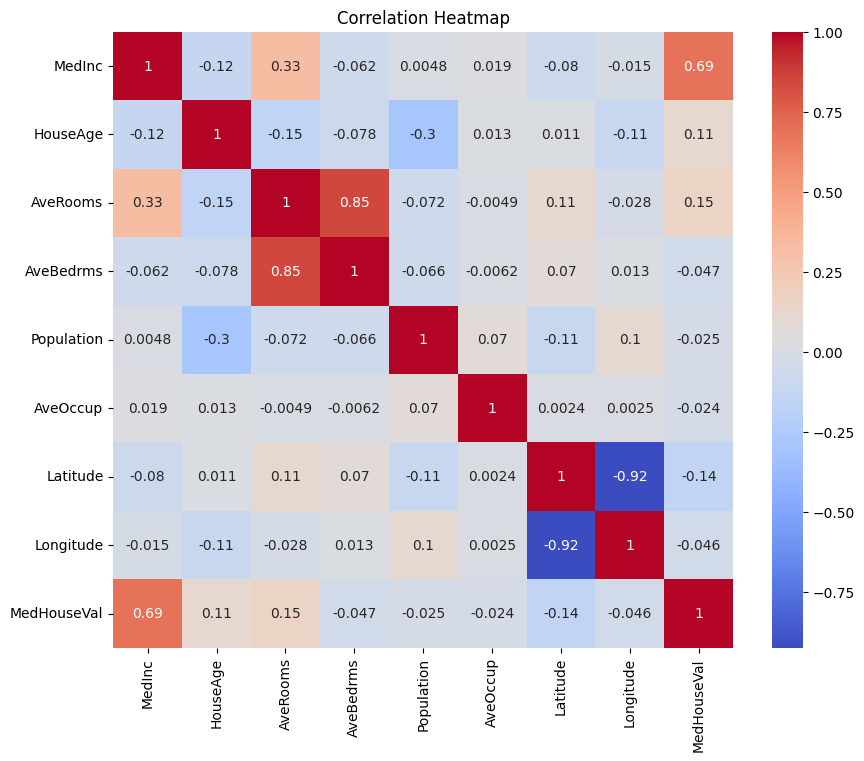

In [7]:
# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Step 3: Check for missing values

In [8]:
missing_info = df.isnull().sum().to_frame(name="MissingValues")
missing_info["Percent"] = (missing_info["MissingValues"]/len(df))*100
print(missing_info)

             MissingValues  Percent
MedInc                   0      0.0
HouseAge                 0      0.0
AveRooms                 0      0.0
AveBedrms                0      0.0
Population               0      0.0
AveOccup                 0      0.0
Latitude                 0      0.0
Longitude                0      0.0
MedHouseVal              0      0.0


In [9]:
# fill missing numeric values with median
df = df.fillna(df.median)

## Step 4: Outlier Detection

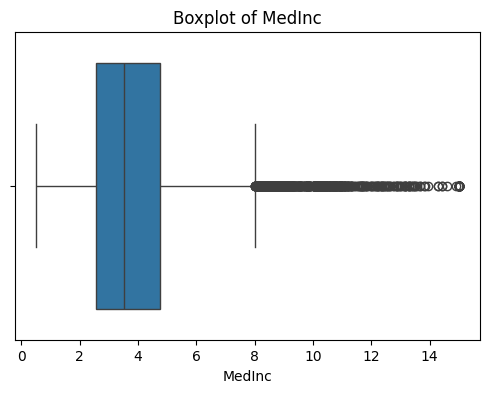

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["MedInc"])
plt.title("Boxplot of MedInc")
plt.show()

In [11]:
# Capping outliers in 'MedInc'
Q1 = df["MedInc"].quantile(0.01)
Q3 = df["MedInc"].quantile(0.99)
df["MedInc"] = np.where(df["MedInc"] < Q1, Q1, df["MedInc"])
df["MedInc"] = np.where(df["MedInc"] > Q3, Q3, df["MedInc"])

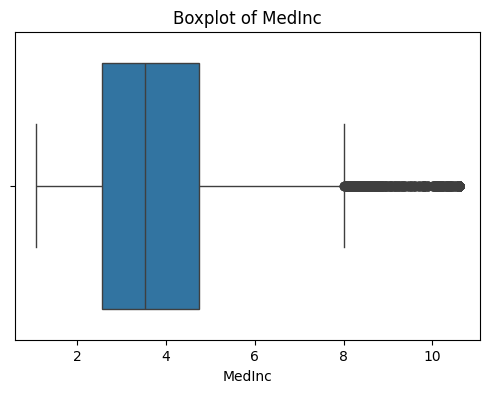

In [12]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["MedInc"])
plt.title("Boxplot of MedInc")
plt.show()

## Step 5: Feature Engineering & Encoding

In [13]:
# Add a fake categorical column just for practice
df['Region'] = np.random.choice(['North', 'South', 'East', 'West'], size=len(df))

In [14]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Region
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,North
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,East
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,West
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,South
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,East
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,North
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,South
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,West
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,West


In [15]:
# Encode categorical column using One-Hot Encoding
df = pd.get_dummies(df, columns=['Region'], drop_first=True)

In [16]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Region_North,Region_South,Region_West
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,True,False,False
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,False,False,False
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,False,False,True
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,False,True,False
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,False,False,False


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_features = scaler.fit_transform(df.drop("MedHouseVal",axis=1))

X = pd.DataFrame(scaled_features,columns=df.drop("MedHouseVal",axis=1).columns)
y  = df["MedHouseVal"]

In [18]:
from sklearn.model_selection import train_test_split


# Split data: 80% train, 20% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train Shape",X_train.shape)
print("Test Shape", X_test.shape)

Train Shape (16512, 11)
Test Shape (4128, 11)


In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

MAE: 0.525660488042678
MSE: 0.5480456003534111
RMSE: 0.7403010200948065
R² Score: 0.5817751484814225


In [21]:
from sklearn.model_selection import cross_val_score

# 5-fold cross-validation with R² as scoring
cv_scores = cross_val_score(lr, X, y, cv=5, scoring='r2')

print("Cross-validation R² scores:", cv_scores)
print("Average R²:", np.mean(cv_scores))


Cross-validation R² scores: [0.54828987 0.49456678 0.56939543 0.5466669  0.67642046]
Average R²: 0.5670678864570053
